## Project on supervised Learning - Classification

###### Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the dataset

In [2]:

mydata = pd.read_csv("admission.csv")
mydata.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


#### Renaming the column names:

In [3]:
mydata.rename(columns = {"Chance of Admit " : "Admit"}, inplace = True)
mydata.rename(columns = {"GRE Score" : "GRE_Score"}, inplace = True)
mydata.rename(columns = {"TOEFL Score" : "TOEFL_Score"}, inplace = True)
mydata.rename(columns = {"University Rating" : "University_Rating"}, inplace = True)

mydata.head(10)

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


### 1.The minimum and maximum values for GRE SCORE

In [4]:
print("Maximum value for GRE is : ", mydata['GRE_Score'].max())
print("Minimum value for GRE is : ", mydata['GRE_Score'].min())

Maximum value for GRE is :  340
Minimum value for GRE is :  290


In [5]:
mydata_corr = mydata.corr()
mydata_corr

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


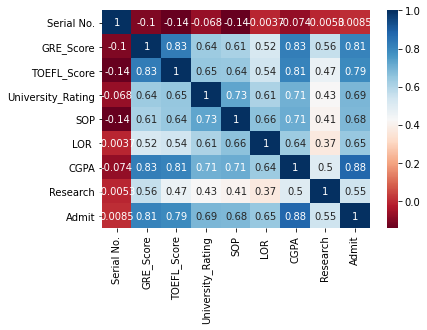

In [6]:
sns.heatmap(mydata_corr, annot = True, cmap = 'RdBu')

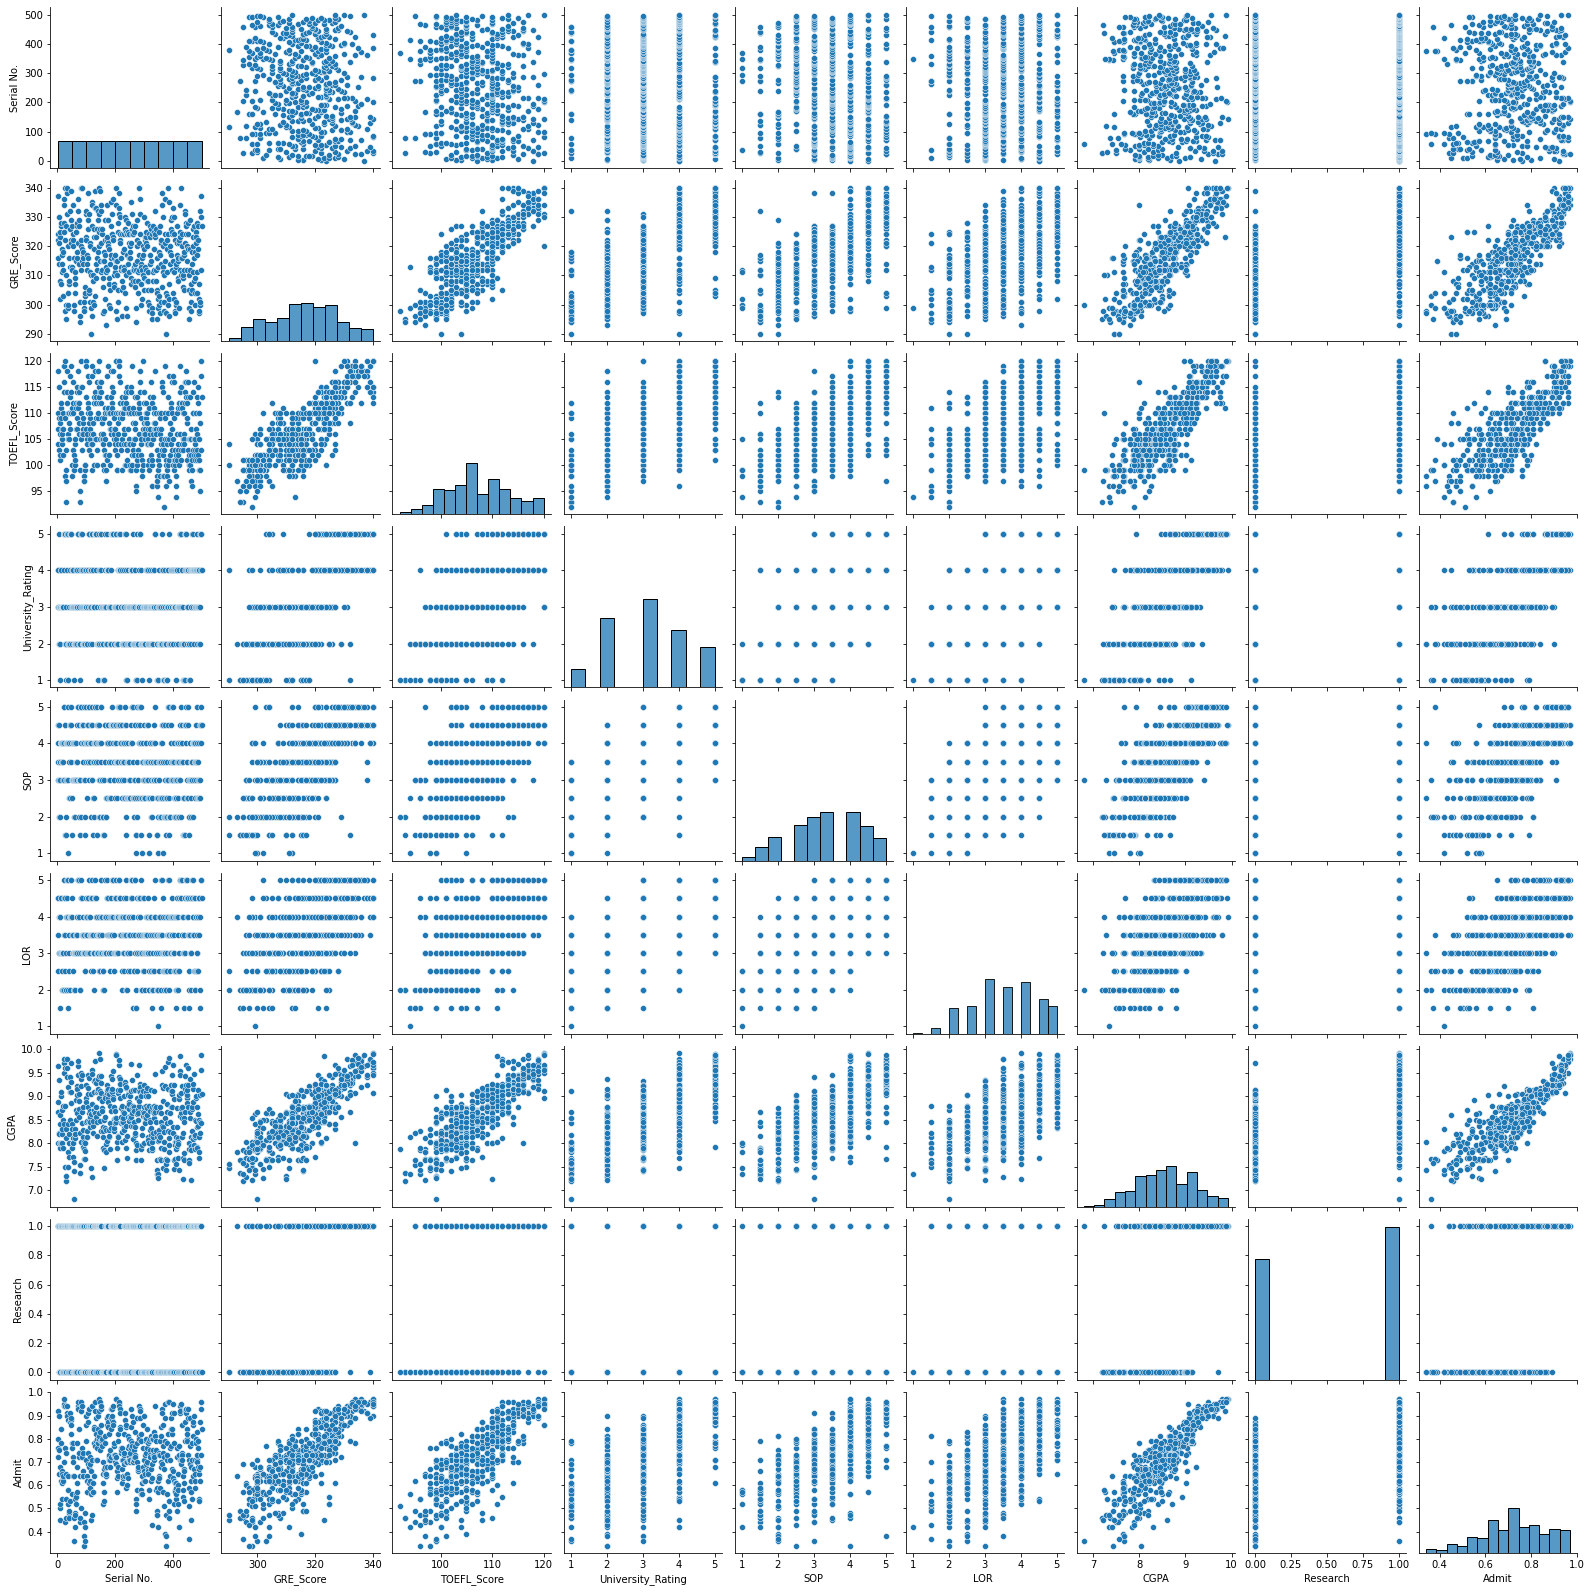

In [7]:
sns.pairplot(mydata)

In [8]:
y_dep = mydata['Admit']
y_dep = [1 if each > 0.80 else 0 for each in y_dep]

In [9]:
x_ind = mydata.drop('Admit', axis = 1)
x_ind

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


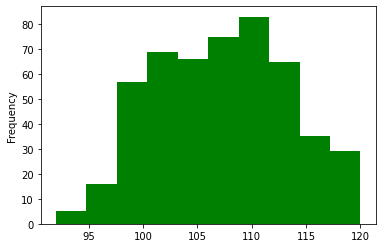

In [10]:
mydata.TOEFL_Score.plot.hist(color="green");

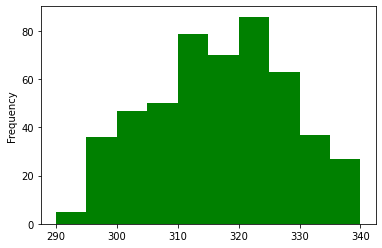

In [11]:
mydata.GRE_Score.plot.hist(color="green")

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,test_size = 0.2, random_state = 2)

In [14]:
from sklearn import tree

In [15]:
model = tree.DecisionTreeClassifier()
model= model.fit(x_train,y_train)

In [16]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[68,  5],
       [ 4, 23]])

In [18]:
accuracy_score(y_test,y_pred)

0.91

In [19]:
from sklearn.metrics  import classification_report
c_report = classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        73
           1       0.82      0.85      0.84        27

    accuracy                           0.91       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.91      0.91      0.91       100



In [20]:
import graphviz # software to display DecisionTree graph
from sklearn.externals.six import StringIO # pass the input parameteres
from sklearn.tree import export_graphviz # export the software into our DT tree
import IPython # Display image
from IPython.display import Image 
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [21]:
my_graph=StringIO()

In [22]:
export_graphviz(model,out_file=my_graph,filled=True,feature_names=['Serial No.', 'GRE_Score', 'TOEFL_Score	', 'University_Rating', 'SOP', 'LOR',
                                'CGPA', 'Research'])

In [23]:
graph=pydotplus.graph_from_dot_data(my_graph.getvalue())

In [24]:
graph.write_jpg("Decision_Tree.jpg") 

True

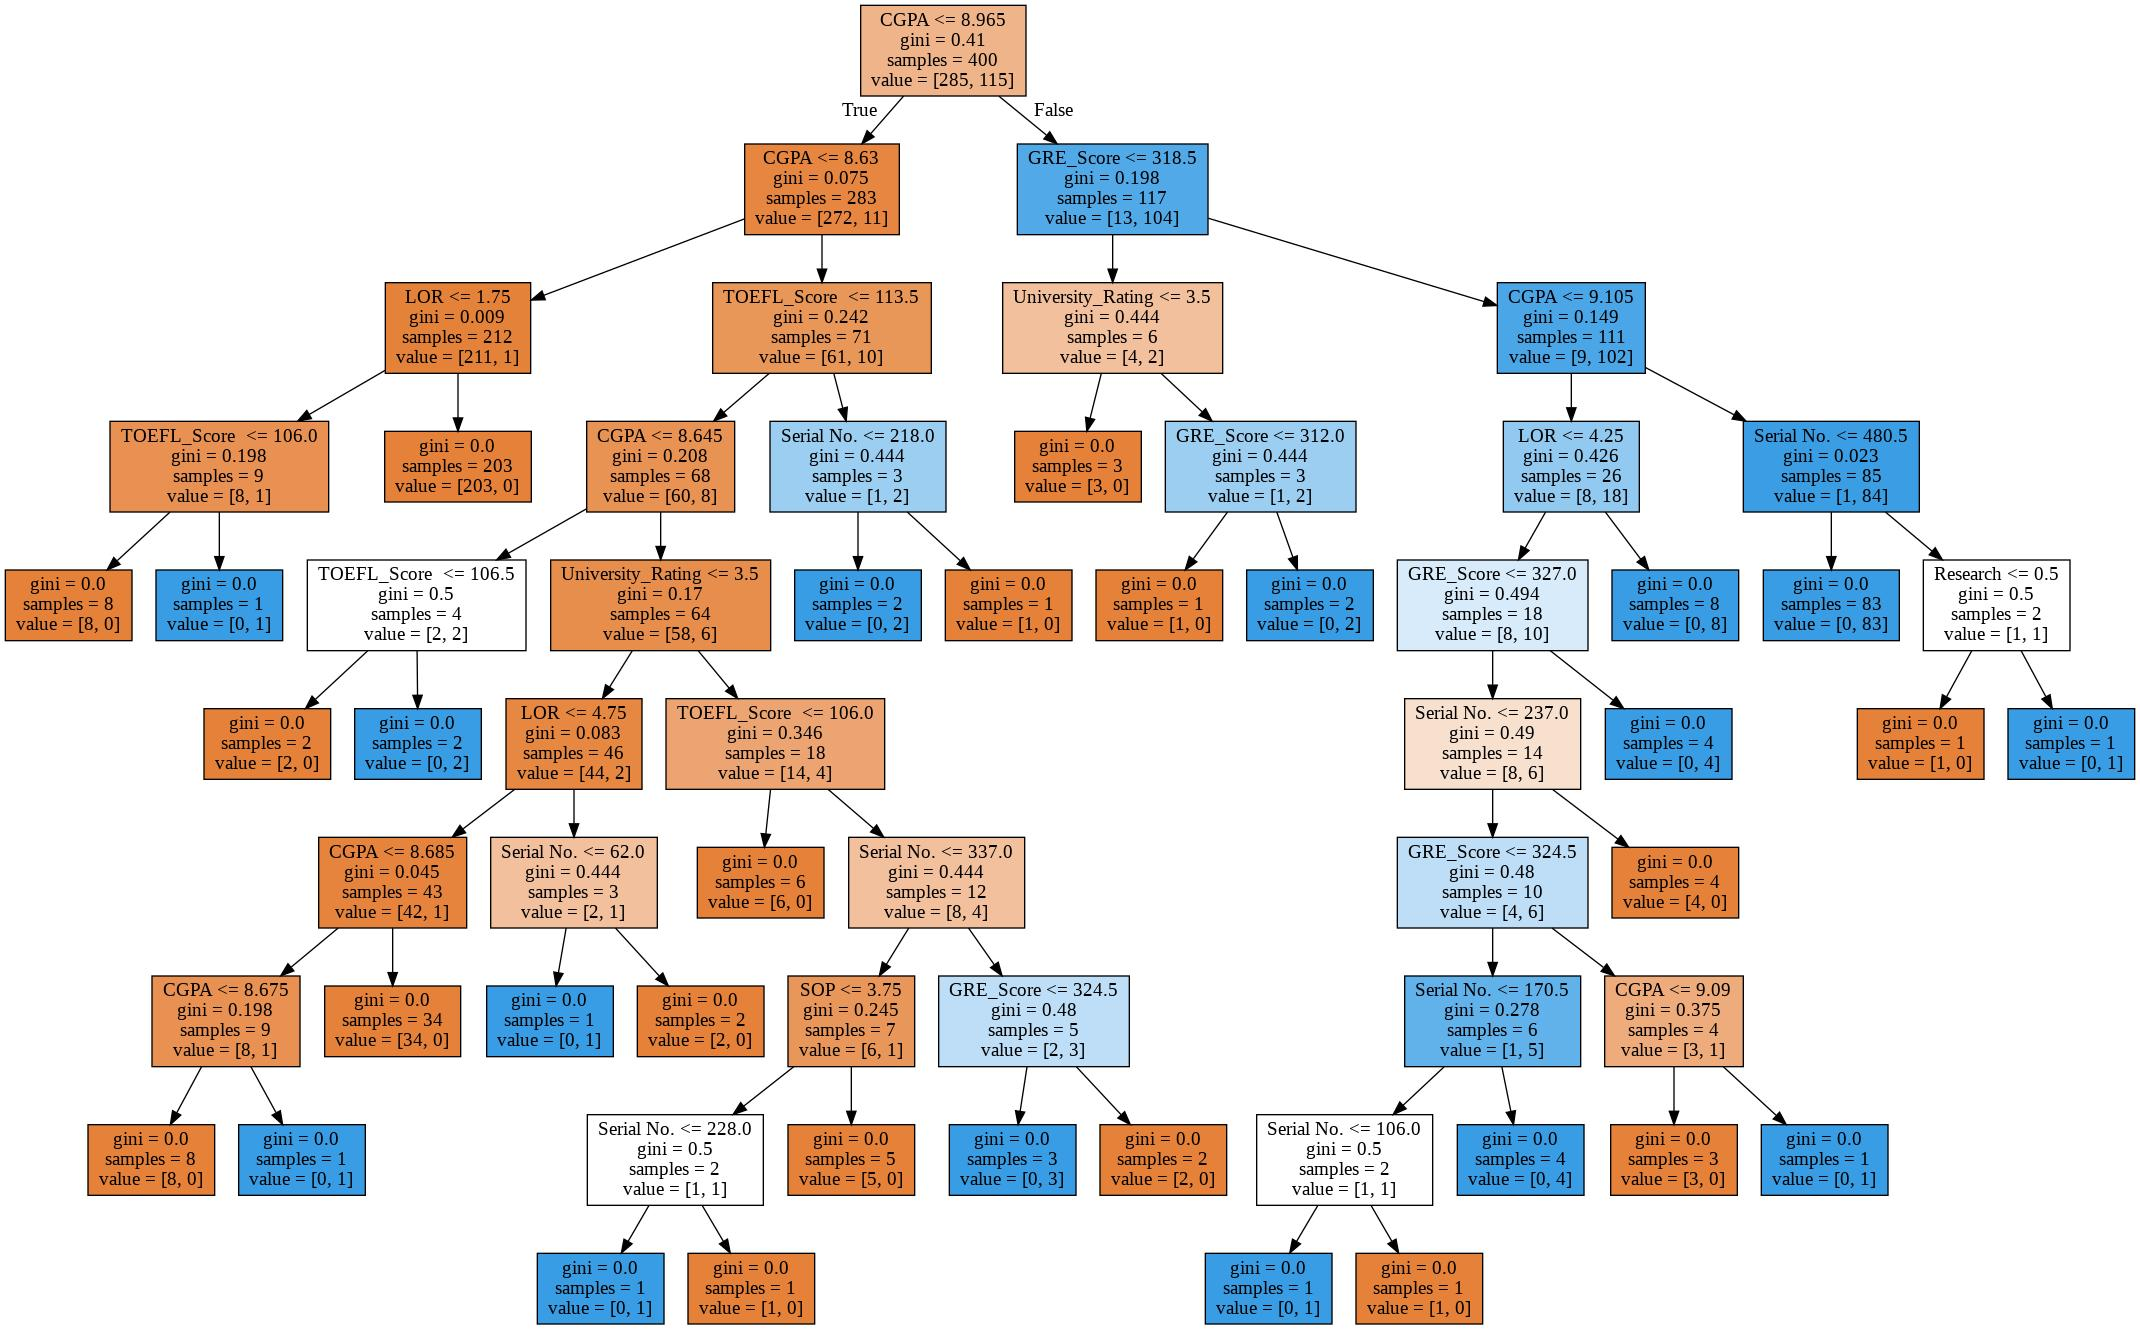

In [25]:
Image(graph.create_jpg()) 

In [26]:
model_E=tree.DecisionTreeClassifier(criterion="entropy",random_state = 2)

In [27]:
model_E=model_E.fit(x_train,y_train)

In [28]:
y_pred_E=model_E.predict(x_test)

In [29]:
y_pred_E

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [30]:
confusion_matrix(y_test,y_pred_E)

array([[65,  8],
       [ 3, 24]])

In [31]:
accuracy_score(y_test,y_pred_E)

0.89

In [32]:
from sklearn.metrics  import classification_report
c_report = classification_report(y_test,y_pred_E)
print(c_report)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        73
           1       0.75      0.89      0.81        27

    accuracy                           0.89       100
   macro avg       0.85      0.89      0.87       100
weighted avg       0.90      0.89      0.89       100



In [33]:
my_graph = StringIO()

In [34]:
export_graphviz(model,out_file=my_graph,filled=True,feature_names=['Serial No.', 'GRE_Score', 'TOEFL_Score	', 'University_Rating', 'SOP', 'LOR',
                                'CGPA', 'Research'])

In [35]:
graph=pydotplus.graph_from_dot_data(my_graph.getvalue())
graph

In [36]:
graph.write_jpg("Decision_Tree.jpg")

True

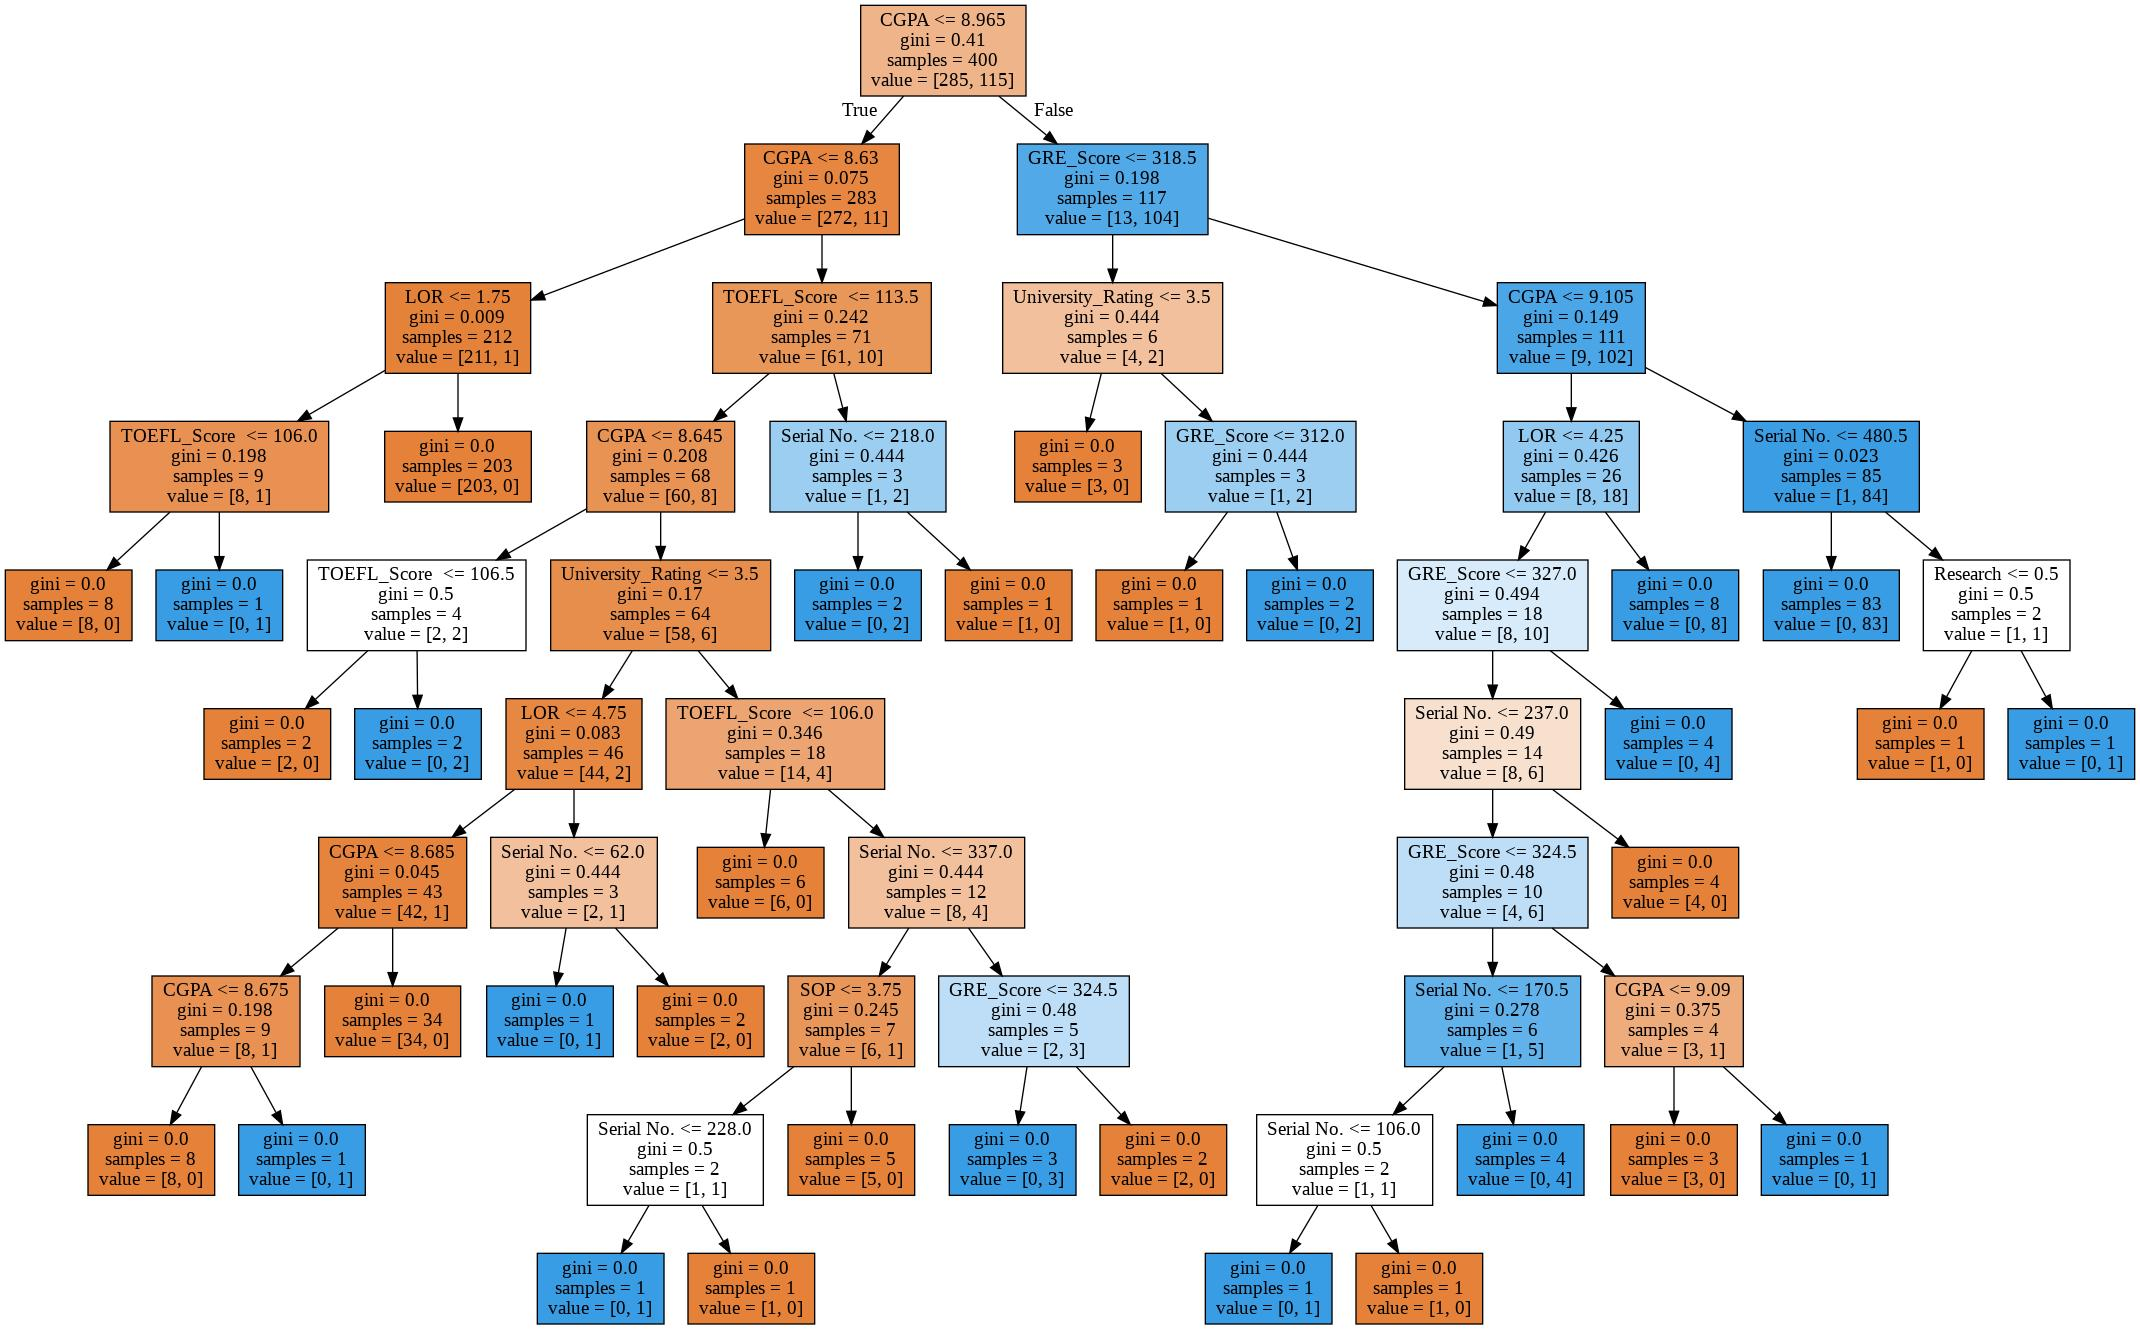

In [37]:
Image(graph.create_jpg())

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
parameters={"max_depth":(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),
            'max_features':('log2','auto','sqrt'),'min_samples_split':(2,4,6)}  # set the parameters.

In [40]:
DT_hp=RandomizedSearchCV(tree.DecisionTreeClassifier(random_state = 2),param_distributions=parameters,cv=5)

In [41]:
DT_hp.fit(x_train,y_train) 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=2,
             

In [42]:
DT_hp.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [43]:
model_after_Ht=tree.DecisionTreeClassifier(criterion='gini', max_depth=50, max_features='sqrt',random_state = 2)

In [44]:
model_after_Ht=model_after_Ht.fit(x_train,y_train)

In [45]:
y_pred_after_hp=model_after_Ht.predict(x_test)

In [46]:
confusion_matrix(y_test,y_pred_after_hp)

array([[70,  3],
       [ 3, 24]])

In [47]:
accuracy_score(y_test,y_pred_after_hp)

0.94

In [48]:
from sklearn.metrics  import classification_report
c_report = classification_report(y_test,y_pred_after_hp)
print(c_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        73
           1       0.89      0.89      0.89        27

    accuracy                           0.94       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.94      0.94      0.94       100



In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_rf =RandomForestClassifier(random_state = 2)

In [51]:
model_rf = model_rf.fit(x_train,y_train)

In [52]:
y_pred_rf = model_rf.predict(x_test)
y_pred_rf

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred_rf)

array([[70,  3],
       [ 4, 23]])

In [54]:
accuracy_score(y_test,y_pred_rf)

0.93

In [55]:
from sklearn.metrics  import classification_report
c_report = classification_report(y_test,y_pred_rf)
print(c_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1       0.88      0.85      0.87        27

    accuracy                           0.93       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.93      0.93      0.93       100



In [56]:
model_rfe=RandomForestClassifier(criterion="entropy",random_state = 2)

In [57]:
model_rfe = model_rfe.fit(x_train,y_train)

In [58]:
y_pred_rfe = model_rfe.predict(x_test)
y_pred_rfe

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [59]:
confusion_matrix(y_test,y_pred_rfe)

array([[71,  2],
       [ 4, 23]])

In [60]:
c_report = classification_report(y_test,y_pred_rfe)
print(c_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.92      0.85      0.88        27

    accuracy                           0.94       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.94      0.94      0.94       100



In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
model_GB = GradientBoostingClassifier(random_state = 2)

In [63]:
model_GB.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
y_pred_GB = model_GB.predict(x_test)
y_pred_GB

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [65]:
confusion_matrix(y_test,y_pred_GB)

array([[69,  4],
       [ 3, 24]])

In [66]:
accuracy_score(y_test,y_pred_GB)

0.93

In [67]:
c_report = classification_report(y_test,y_pred_GB)
print(c_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        73
           1       0.86      0.89      0.87        27

    accuracy                           0.93       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.93      0.93      0.93       100



In [68]:
import xgboost

In [69]:
from xgboost import XGBClassifier

In [70]:
model_XG = XGBClassifier(random_state= 2)

In [71]:
model_XG.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [72]:
y_pred_XG = model_XG.predict(x_test)
y_pred_XG

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred_XG)

array([[68,  5],
       [ 3, 24]])

In [74]:
accuracy_score(y_test,y_pred_XG)

0.92

In [75]:
c_report = classification_report(y_test,y_pred_XG)
print(c_report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.83      0.89      0.86        27

    accuracy                           0.92       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.92      0.92      0.92       100



In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
model_AB = AdaBoostClassifier(random_state = 2)

In [78]:
 model_AB.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2)

In [79]:
y_pred_AB = model_AB.predict(x_test)
y_pred_AB

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test,y_pred_AB)
confusion_matrix

array([[68,  5],
       [ 2, 25]])

In [81]:
accuracy_score(y_test,y_pred_AB)

0.93

In [82]:
c_report = classification_report(y_test,y_pred_AB)
print(c_report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
           1       0.83      0.93      0.88        27

    accuracy                           0.93       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.93      0.93       100



# Conclusion: 
   The model created using Decision tree predicted values for test is almost equal to actual value. The admit is classifed into 0 and 1.The classification report presented how well our model is by giving precision and recall values.The model predicted the values is 93% accurate.So based on this model we can predict whether the student is admit or not. we can predict unlabed student will admit or not into college.